#Project Title : Country Data

Problem Statement:

HELP International, an international humanitarian NGO dedicated to fighting poverty and providing aid during disasters and natural calamities, has raised $10 million. With this significant sum, the CEO of HELP International aims to allocate funds strategically and effectively to countries most in need of aid. As a Data Scientist, your task is to utilize unsupervised learning techniques to categorize countries based on socio-economic and health factors that determine their overall development.

Objective:

The primary objective is to cluster countries based on relevant socio-economic and health indicators to identify those in the direst need of aid. By categorizing countries into distinct groups, the CEO can prioritize resources and focus aid efforts on regions with the greatest need.

###Import Library

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

###Load Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/project_List/models/All model and dataset/Country-data/Country-data.csv')

In [4]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
df.shape

(167, 10)

In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,167,167,Afghanistan,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
child_mort,167.0,NaN,NaN,NaN,38.27006,40.328931,2.6,8.25,19.3,62.1,208.0
exports,167.0,NaN,NaN,NaN,41.108976,27.41201,0.109,23.8,35.0,51.35,200.0
health,167.0,NaN,NaN,NaN,6.815689,2.746837,1.81,4.92,6.32,8.6,17.9
imports,167.0,NaN,NaN,NaN,46.890215,24.209589,0.0659,30.2,43.3,58.75,174.0
income,167.0,NaN,NaN,NaN,17144.688623,19278.067698,609.0,3355.0,9960.0,22800.0,125000.0
inflation,167.0,NaN,NaN,NaN,7.781832,10.570704,-4.21,1.81,5.39,10.75,104.0
life_expec,167.0,NaN,NaN,NaN,70.555689,8.893172,32.1,65.3,73.1,76.8,82.8
total_fer,167.0,NaN,NaN,NaN,2.947964,1.513848,1.15,1.795,2.41,3.88,7.49
gdpp,167.0,NaN,NaN,NaN,12964.155689,18328.704809,231.0,1330.0,4660.0,14050.0,105000.0


In [8]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

###EDA

In [9]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


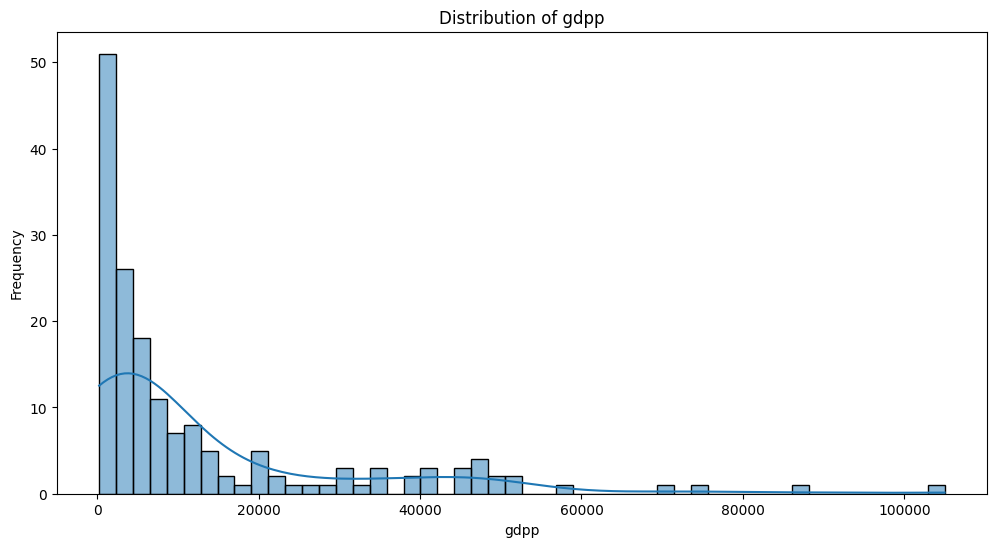

In [10]:
# Plot 1: GDPP distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['gdpp'], bins=50, kde=True)
plt.title('Distribution of gdpp')
plt.xlabel('gdpp')
plt.ylabel('Frequency')
plt.show()

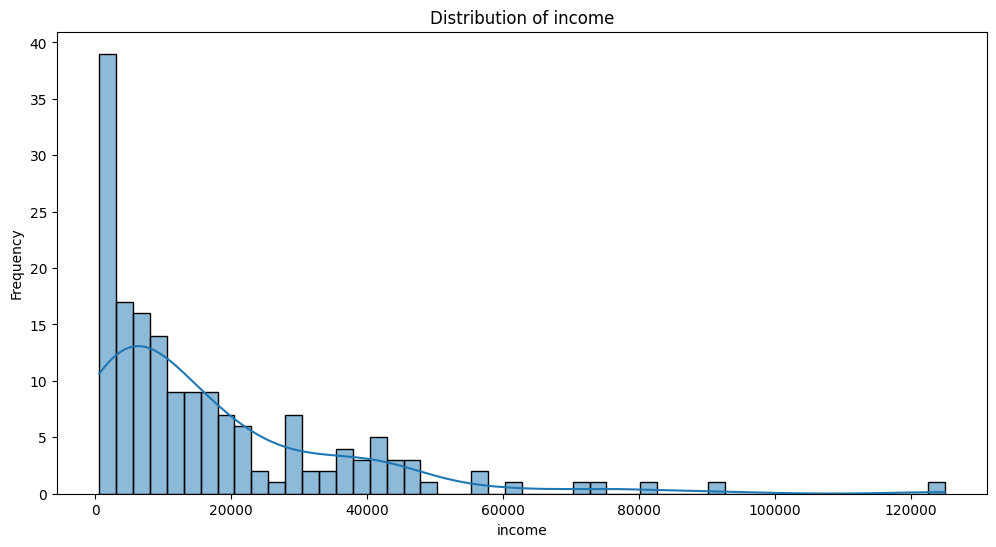

In [11]:
# Plot 2: Customers distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['income'], bins=50, kde=True)
plt.title('Distribution of income')
plt.xlabel('income')
plt.ylabel('Frequency')
plt.show()

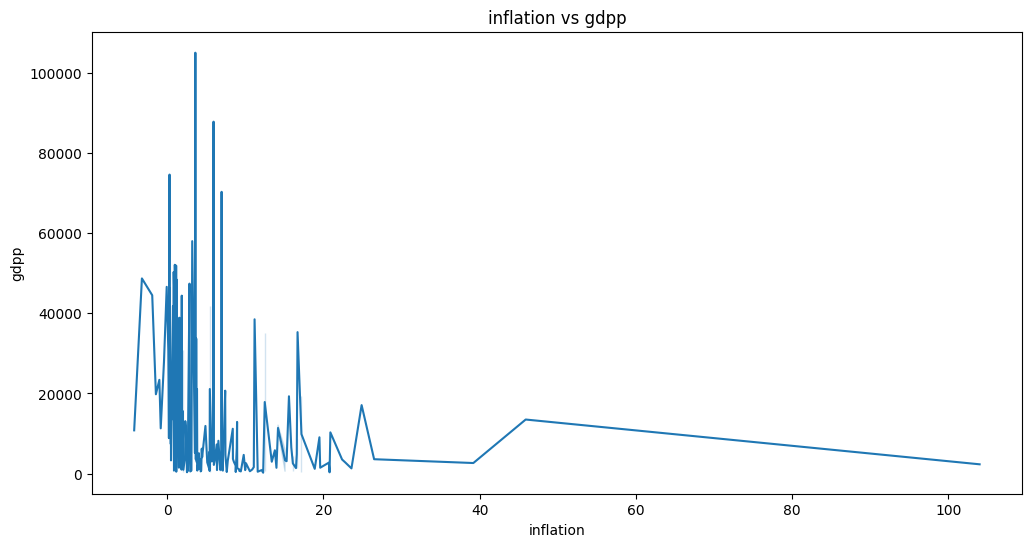

In [12]:
# Plot 3: inflation vs. gdpp
plt.figure(figsize=(12, 6))
sns.lineplot(x='inflation', y='gdpp', data=df)
plt.title('inflation vs gdpp')
plt.xlabel('inflation')
plt.ylabel('gdpp')
plt.show()

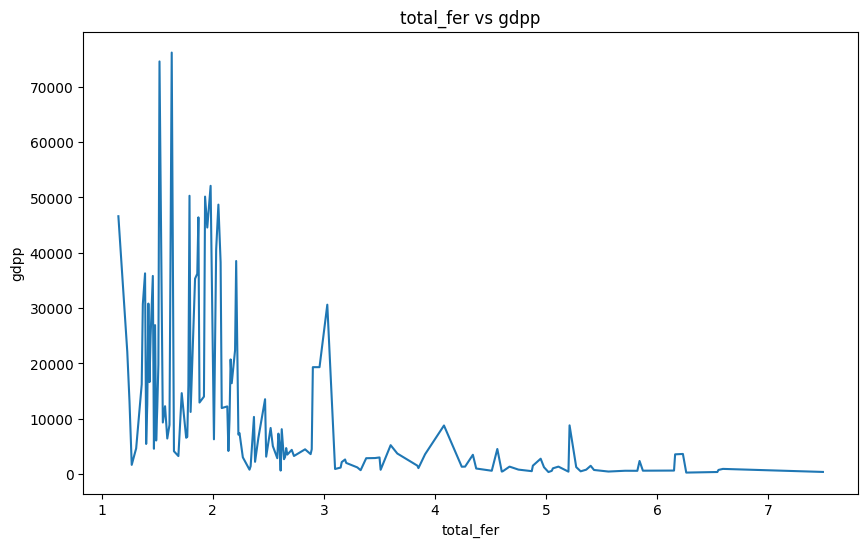

In [13]:
# Plot 4 : total_fer vs gdpp
plt.figure(figsize=(10, 6))
sns.lineplot(x='total_fer', y='gdpp', data=df, ci=None)
plt.title('total_fer vs gdpp')
plt.xlabel('total_fer')
plt.ylabel('gdpp')
plt.show()

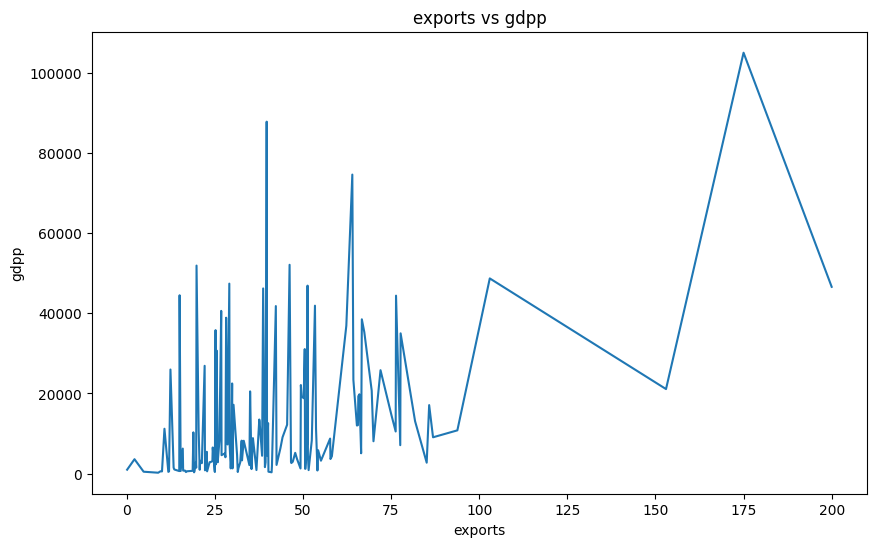

In [14]:
# Plot 5 : exports vs gdpp
plt.figure(figsize=(10, 6))
sns.lineplot(x='exports', y='gdpp', data=df, ci=None)
plt.title('exports vs gdpp')
plt.xlabel('exports')
plt.ylabel('gdpp')
plt.show()

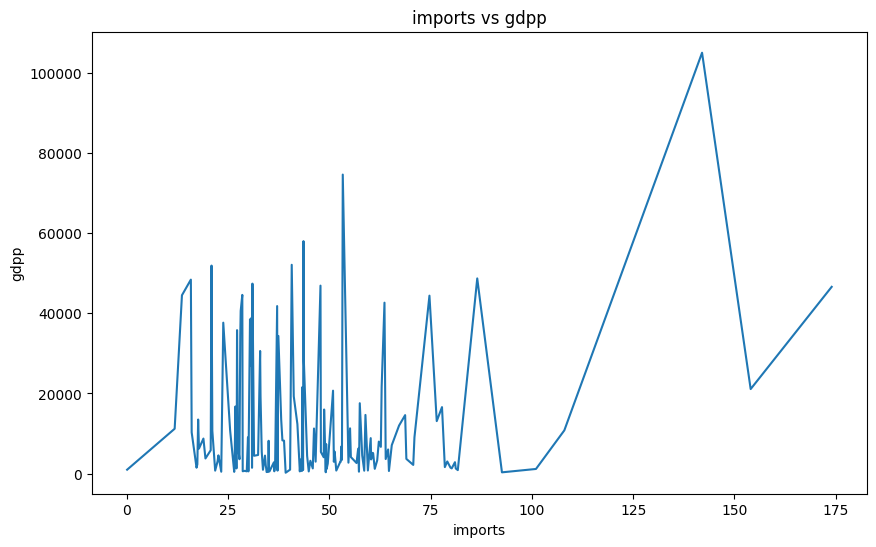

In [15]:
# Plot 5 : imports vs gdpp
plt.figure(figsize=(10, 6))
sns.lineplot(x='imports', y='gdpp', data=df, ci=None)
plt.title('imports vs gdpp')
plt.xlabel('imports')
plt.ylabel('gdpp')
plt.show()

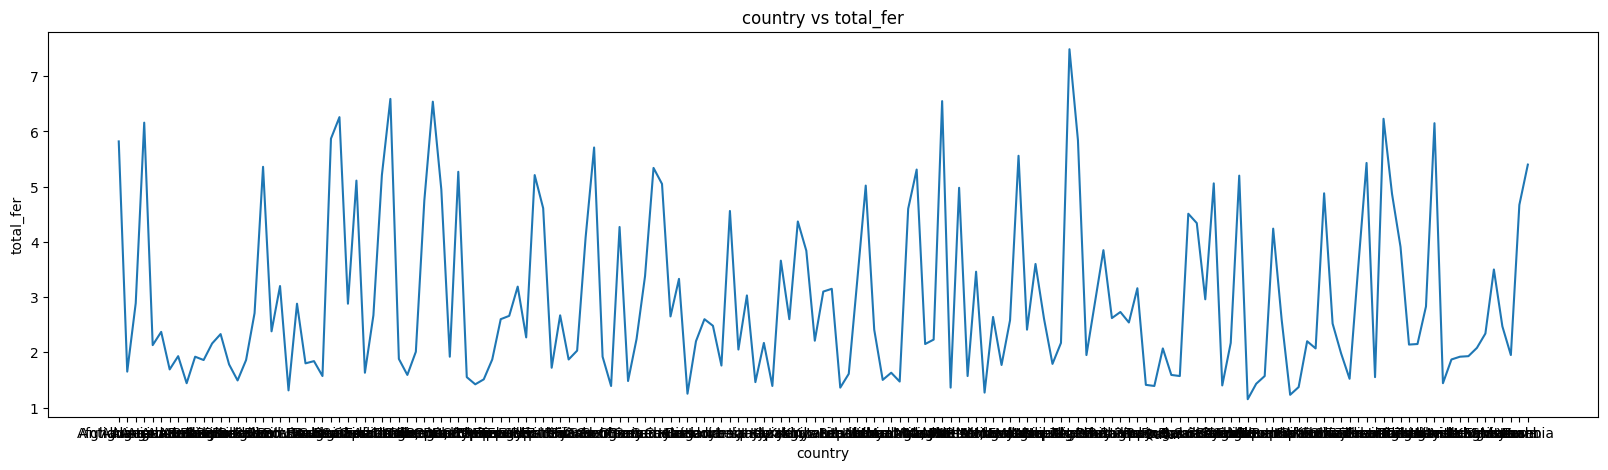

In [16]:
# Plot 6: country vs total_fer
plt.figure(figsize=(20, 5))
sns.lineplot(x='country', y='total_fer', data=df, ci=None)
plt.title('country vs total_fer')
plt.xlabel('country')
plt.ylabel('total_fer')
plt.show()

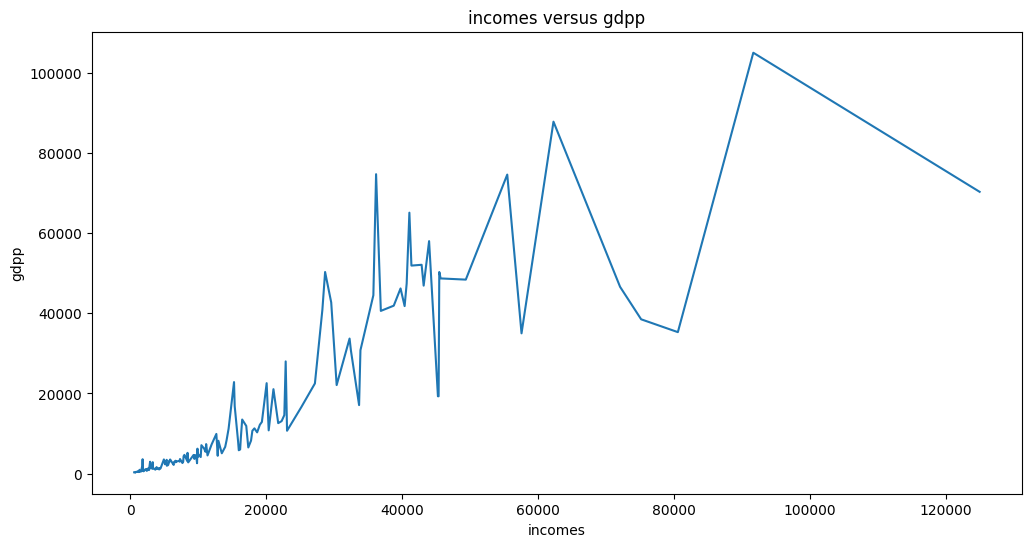

In [17]:
# Plot 7: Total Sales Trend Over Time
plt.figure(figsize=(12, 6))
df.groupby('income')['gdpp'].sum().plot()
plt.title('incomes versus gdpp')
plt.xlabel('incomes')
plt.ylabel('gdpp')
plt.show()

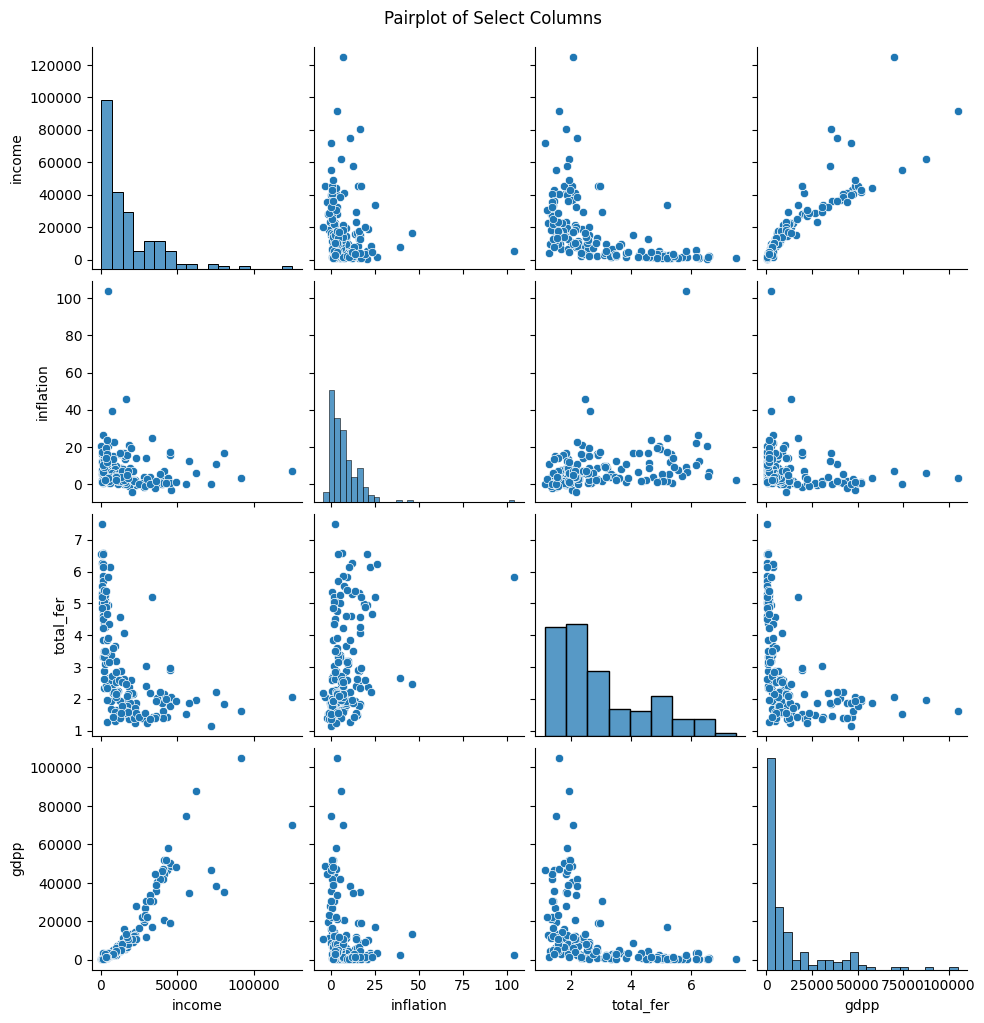

In [18]:
# Plot 8: Pairplot of Select Columns
sns.pairplot(df[['income','inflation', 'total_fer', 'gdpp']])
plt.suptitle('Pairplot of Select Columns', y=1.02)
plt.show()

In [19]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


###Heatmap

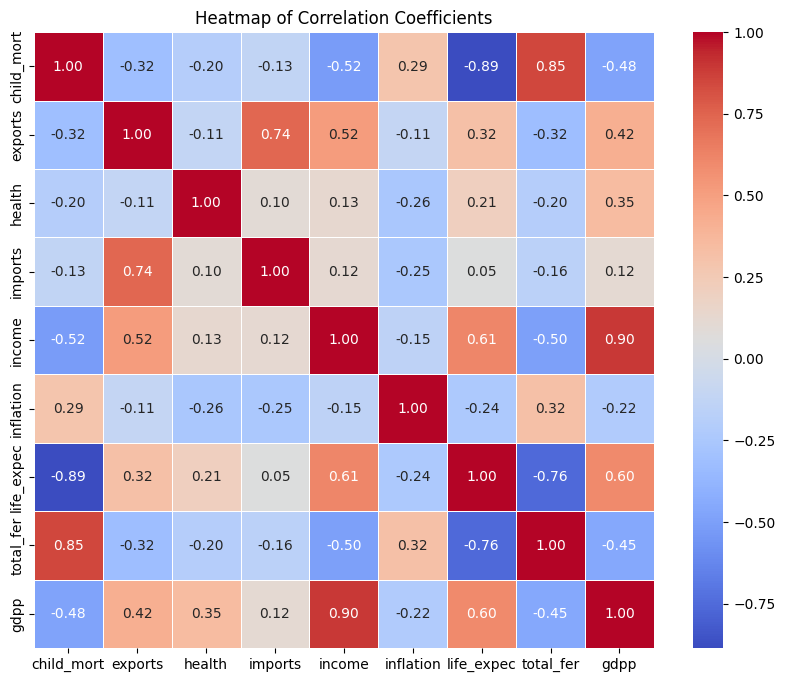

In [20]:
corr_matrix = df[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Correlation Coefficients')
plt.show()

In [21]:
df=df.drop(columns=['child_mort'])

In [22]:
df=df.drop(columns=['gdpp'])

In [23]:
df.head()

,country,exports,health,imports,income,inflation,life_expec,total_fer
0,Afghanistan,10.0,7.58,44.9,1610,9.44,56.2,5.82
1,Albania,28.0,6.55,48.6,9930,4.49,76.3,1.65
2,Algeria,38.4,4.17,31.4,12900,16.10,76.5,2.89
3,Angola,62.3,2.85,42.9,5900,22.40,60.1,6.16
4,Antigua and Barbuda,45.5,6.03,58.9,19100,1.44,76.8,2.13


In [24]:
df['country'].value_counts()

country
Afghanistan    1
Morocco        1
Myanmar        1
Namibia        1
Nepal          1
              ..
Georgia        1
Germany        1
Ghana          1
Greece         1
Zambia         1
Name: count, Length: 167, dtype: int64

###One hot encoding

In [25]:
df = pd.get_dummies(df, columns=['country'],dtype=int)

In [26]:
df.head()

,exports,health,imports,income,inflation,life_expec,total_fer,country_Afghanistan,country_Albania,country_Algeria,...,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Vietnam,country_Yemen,country_Zambia
0,10.0,7.58,44.9,1610,9.44,56.2,5.82,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,28.0,6.55,48.6,9930,4.49,76.3,1.65,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,38.4,4.17,31.4,12900,16.10,76.5,2.89,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,62.3,2.85,42.9,5900,22.40,60.1,6.16,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,45.5,6.03,58.9,19100,1.44,76.8,2.13,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###kMeans Clustering

In [67]:
kmeanss = KMeans(n_clusters=2)

In [68]:
kmeanss.fit(df)

KMeans(n_clusters=2)

In [69]:
cluster_labels = kmeanss.labels_

In [70]:
df['clusters'] = cluster_labels

In [71]:
df.head()

,exports,health,imports,income,inflation,life_expec,total_fer,country_Afghanistan,country_Albania,country_Algeria,...,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Vietnam,country_Yemen,country_Zambia,clusters
0,10.0,7.58,44.9,1610,9.44,56.2,5.82,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,28.0,6.55,48.6,9930,4.49,76.3,1.65,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,38.4,4.17,31.4,12900,16.10,76.5,2.89,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,62.3,2.85,42.9,5900,22.40,60.1,6.16,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,45.5,6.03,58.9,19100,1.44,76.8,2.13,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
df['clusters'].value_counts()

clusters
0    128
1     39
Name: count, dtype: int64

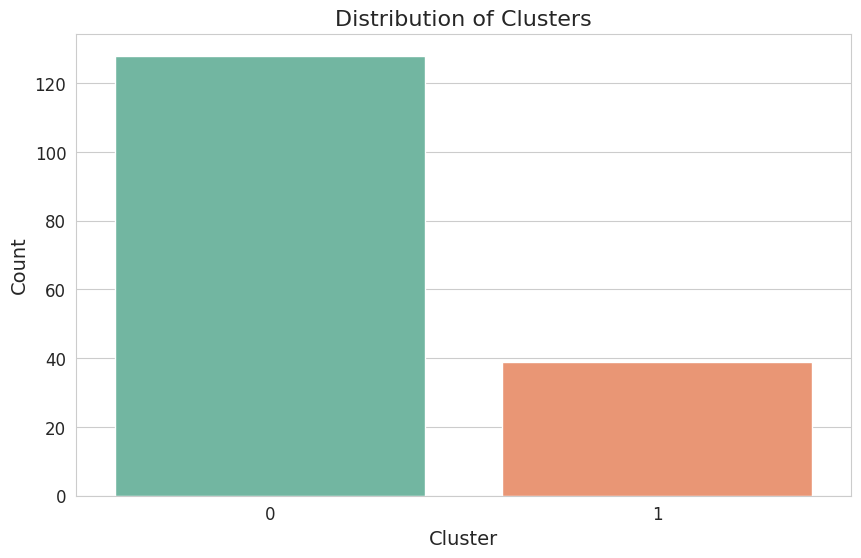

In [73]:
# Set style
sns.set_style("whitegrid")

# Create bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='clusters', data=df, palette='Set2')
plt.title('Distribution of Clusters', fontsize=16)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

###Split X and y

In [74]:
X=df.drop(['clusters'],axis=1)
y=df['clusters']

In [75]:
X[:5]

,exports,health,imports,income,inflation,life_expec,total_fer,country_Afghanistan,country_Albania,country_Algeria,...,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Vietnam,country_Yemen,country_Zambia
0,10.0,7.58,44.9,1610,9.44,56.2,5.82,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,28.0,6.55,48.6,9930,4.49,76.3,1.65,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,38.4,4.17,31.4,12900,16.10,76.5,2.89,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,62.3,2.85,42.9,5900,22.40,60.1,6.16,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,45.5,6.03,58.9,19100,1.44,76.8,2.13,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
y.value_counts()

clusters
0    128
1     39
Name: count, dtype: int64

###Smote

In [104]:
# Create SMOTE object
smote = SMOTE(random_state=42)

In [105]:
# Apply SMOTE to balance the clusters
X_resampled, y_resampled = smote.fit_resample(X, y)

###Split train and test

In [107]:
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=35)

In [108]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(204, 174)
(52, 174)
(204,)
(52,)


###Feature Scaling

In [109]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

In [110]:
# Fit and transform the scaler on training data, and transform test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

###Logistic Regression

In [111]:
# Initialize Logistic Regression model
log_reg_model = LogisticRegression(random_state=42)

In [112]:
# Fit the model on the scaled training data
log_reg_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [113]:
# Make predictions on the test set
y_pred = log_reg_model.predict(X_test_scaled)

In [114]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        31
           1       0.88      1.00      0.93        21

    accuracy                           0.94        52
   macro avg       0.94      0.95      0.94        52
weighted avg       0.95      0.94      0.94        52



###Random Forest classifier

In [115]:
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

In [116]:
# Fit the model on the scaled training data
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [117]:
# Make predictions on the test set
rf_pred = rf_classifier.predict(X_test_scaled)

In [118]:
# Classification Report for Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        21

    accuracy                           1.00        52
   macro avg       1.00      1.00      1.00        52
weighted avg       1.00      1.00      1.00        52



###SVM classifier

In [119]:
# Initialize SVM classifier
svm_classifier = SVC(random_state=42)

In [120]:
# Fit the model on the scaled training data
svm_classifier.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [121]:
# Make predictions on the test set
svm_pred = svm_classifier.predict(X_test_scaled)

In [122]:
# Classification Report for SVM
print("SVM Classification Report:")
print(classification_report(y_test, svm_pred))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        31
           1       1.00      0.90      0.95        21

    accuracy                           0.96        52
   macro avg       0.97      0.95      0.96        52
weighted avg       0.96      0.96      0.96        52



###K-Nearest Neighbors classifier

In [123]:
# Initialize K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier()

In [124]:
# Fit the model on the scaled training data
knn_classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [125]:
# Make predictions on the test set
knn_pred = knn_classifier.predict(X_test_scaled)

In [126]:
# Classification Report for K-Nearest Neighbors
print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, knn_pred))

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.40      1.00      0.58        21

    accuracy                           0.40        52
   macro avg       0.20      0.50      0.29        52
weighted avg       0.16      0.40      0.23        52



#### Logistic Regression and SVM performs the best. Hence we can consider any of this model.